In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random

In [239]:
# Load the dataset
df = pd.read_csv(r'C:\Users\pruth\Downloads\train_dataset.csv')
df.head()
df.columns

Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [250]:
df

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,14,23,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,0
31579,12,7,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,3
31580,18,5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,1
31581,8,1,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3


In [251]:
print(df.isna().sum())


LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
slice Type              0
dtype: int64


In [252]:
df.describe()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
count,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000
mean,10.974923,11.476459,0.003079,114.126745,0.468100,0.531900,0.441187,0.558813,0.106291,0.057943,0.116107,0.057879,0.059716,0.117722,0.058734,0.425609,1.689580
std,6.053641,6.915643,0.004344,106.320976,0.498989,0.498989,0.496537,0.496537,0.308215,0.233639,0.320358,0.233519,0.236963,0.322283,0.235130,0.494443,0.851352
min,1.000000,0.000000,0.000001,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,0.000001,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11.000000,11.000000,0.001000,75.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,16.000000,17.000000,0.010000,150.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,22.000000,23.000000,0.010000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with numeric columns
numeric_columns = ['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation', 'Smartphone']

# Summary statistics
summary_stats = df[numeric_columns].describe()
print(summary_stats)



       LTE/5g Category          Time  Packet Loss Rate  Packet delay  \
count     31583.000000  31583.000000      31583.000000  31583.000000   
mean         10.974923     11.476459          0.003079    114.126745   
std           6.053641      6.915643          0.004344    106.320976   
min           1.000000      0.000000          0.000001     10.000000   
25%           6.000000      6.000000          0.000001     50.000000   
50%          11.000000     11.000000          0.001000     75.000000   
75%          16.000000     17.000000          0.010000    150.000000   
max          22.000000     23.000000          0.010000    300.000000   

                IoT        LTE/5G           GBR       Non-GBR  AR/VR/Gaming  \
count  31583.000000  31583.000000  31583.000000  31583.000000  31583.000000   
mean       0.468100      0.531900      0.441187      0.558813      0.106291   
std        0.498989      0.498989      0.496537      0.496537      0.308215   
min        0.000000      0.000000  

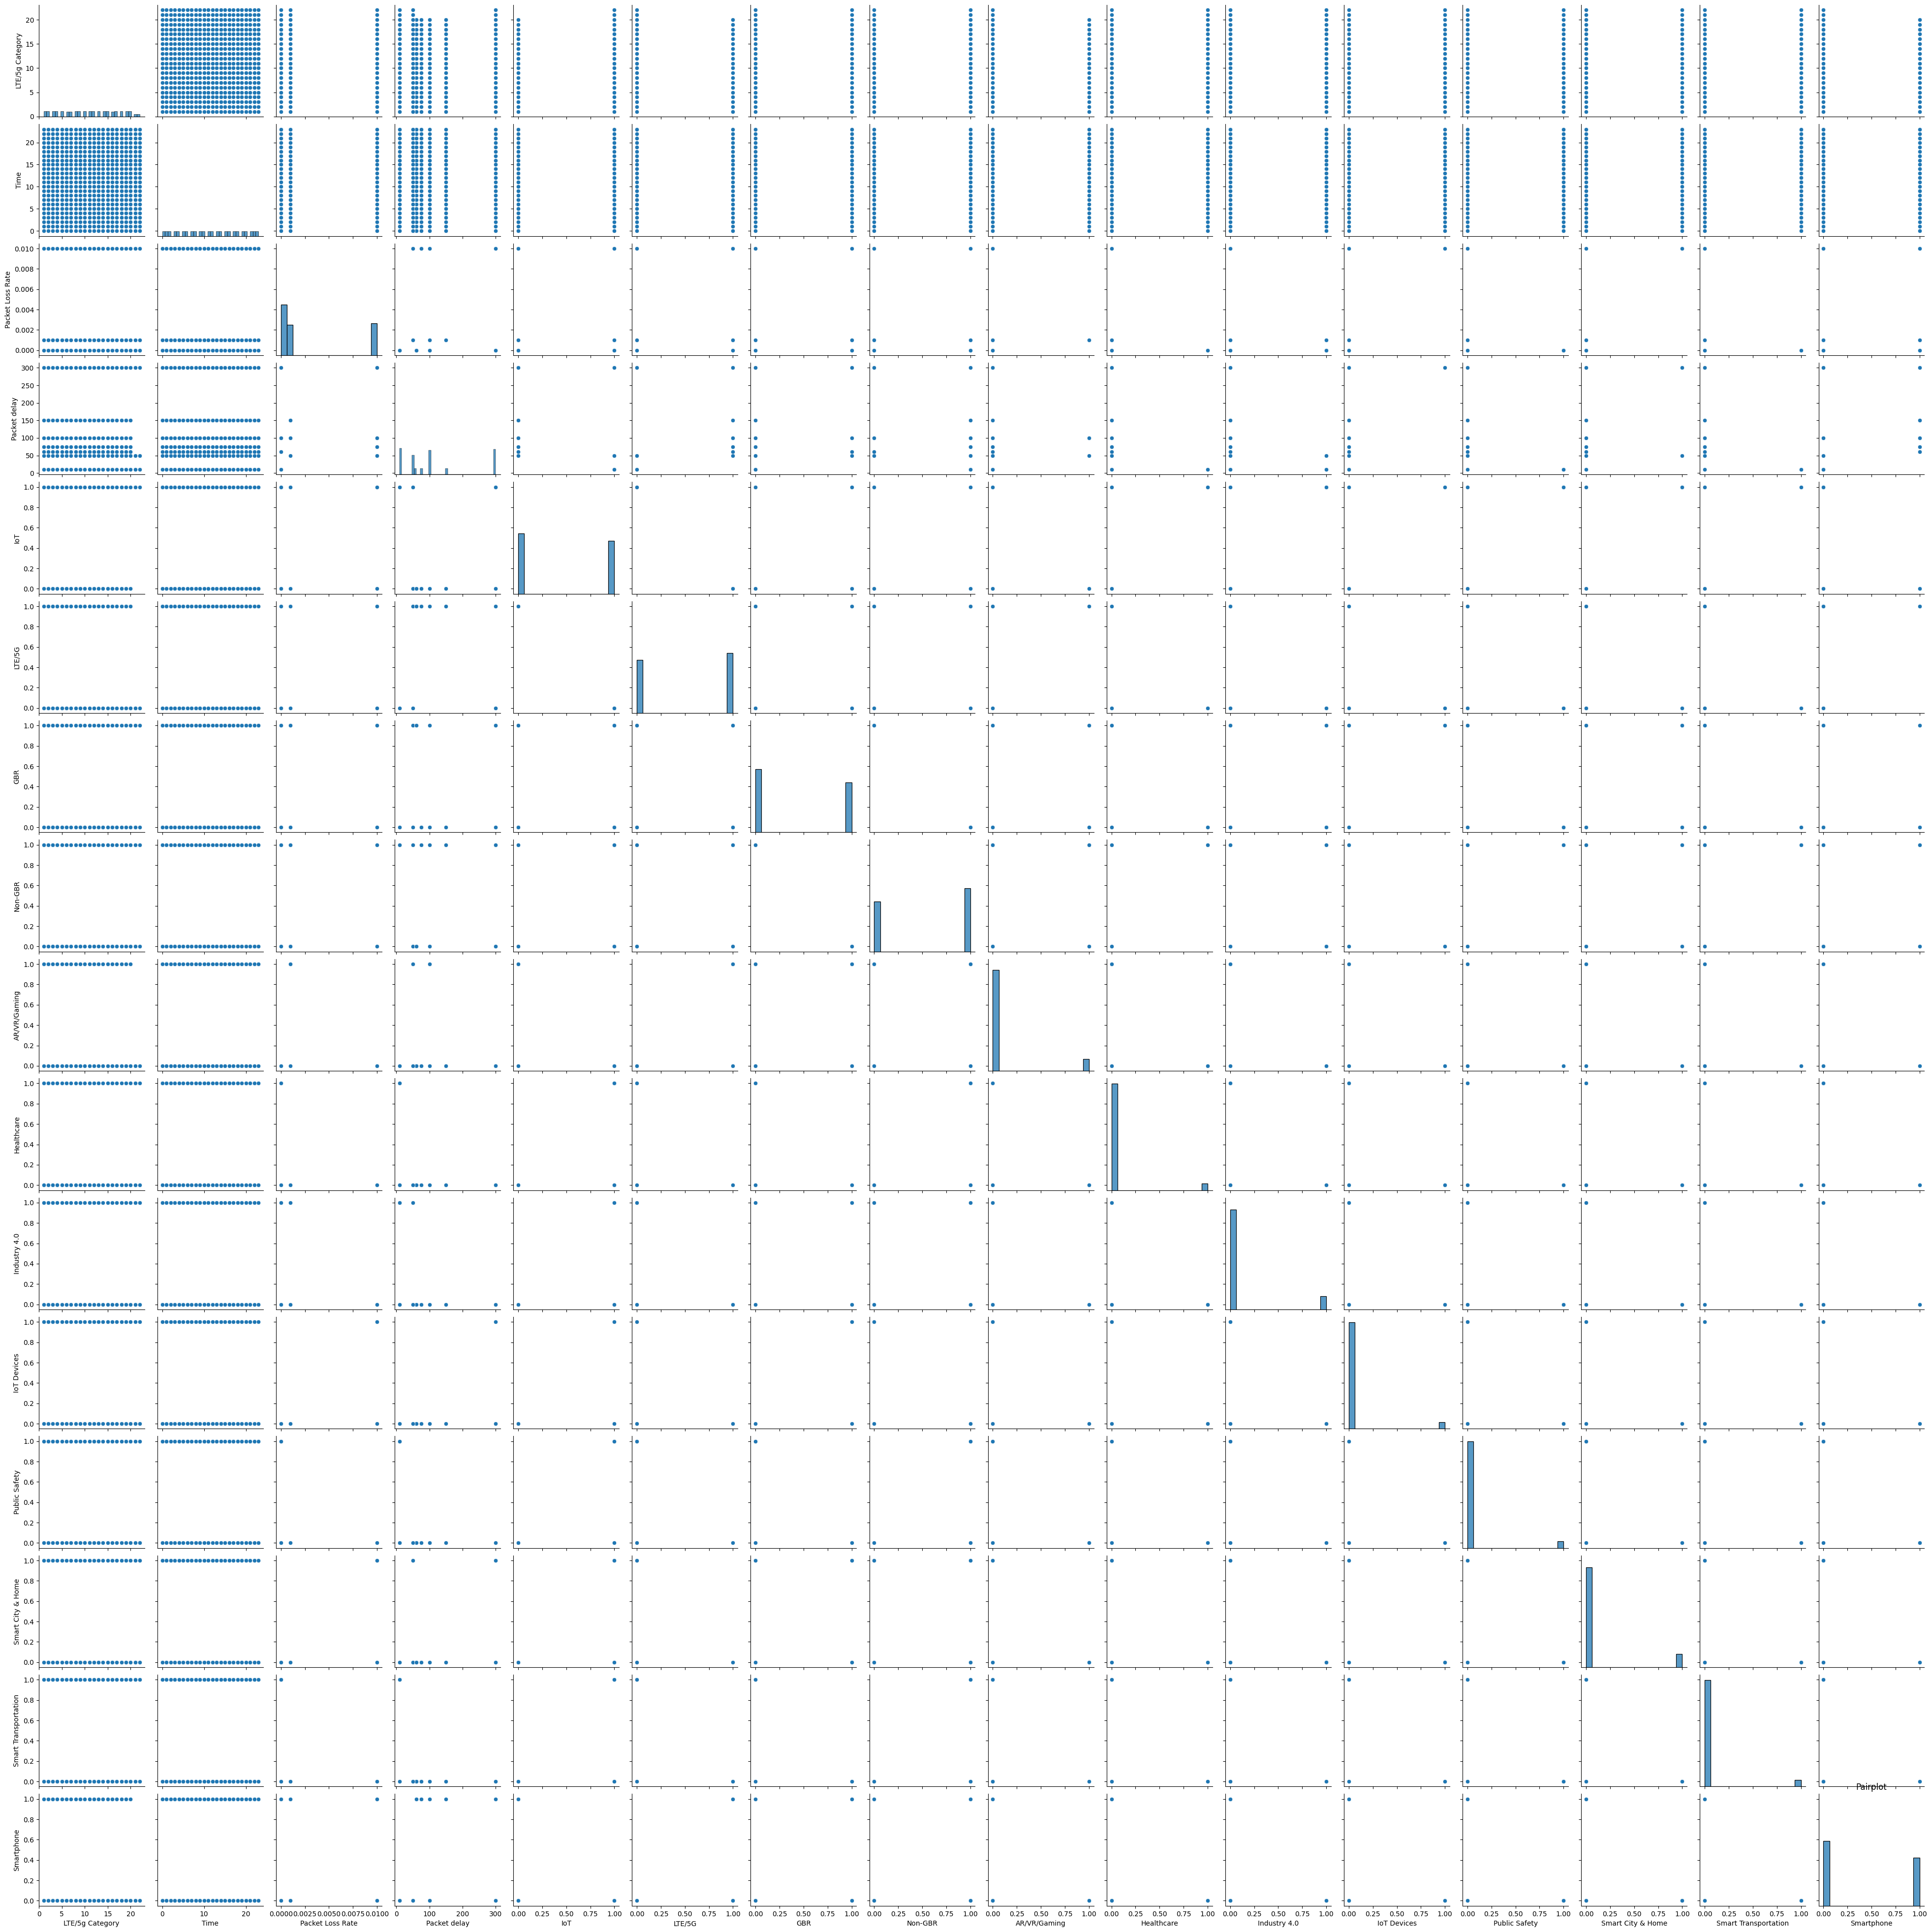

In [254]:

# Pairplot for visualizing relationships between variables
sns.pairplot(df[numeric_columns])
plt.title('Pairplot')
plt.show()


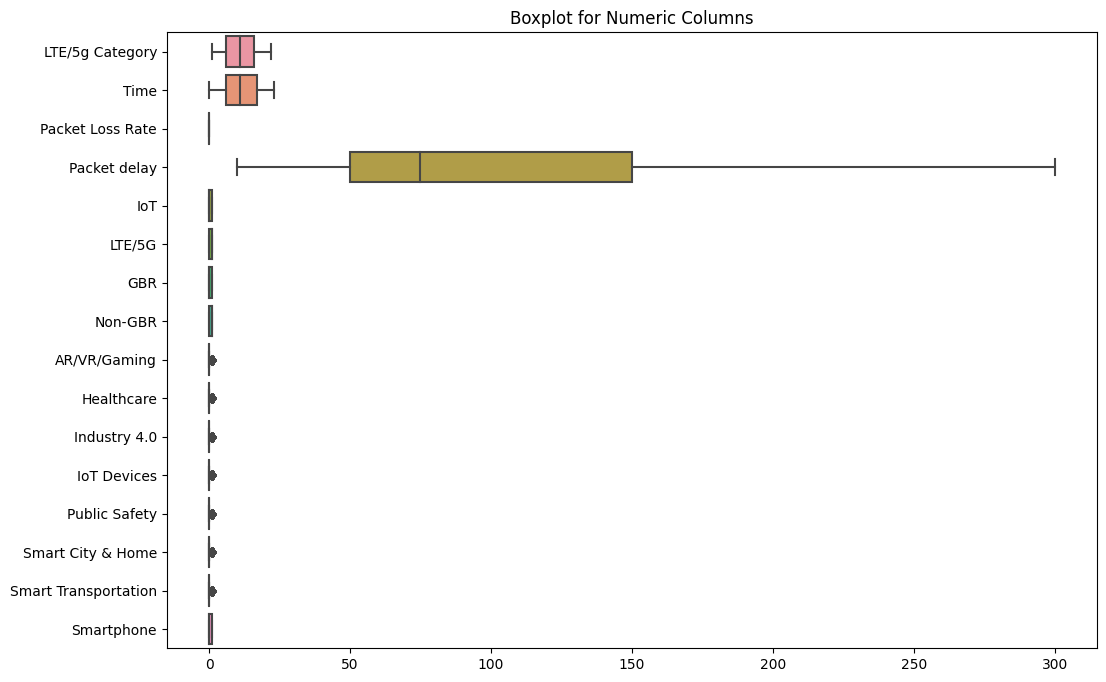

In [255]:

# Boxplot for each numeric column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns], orient='h')
plt.title('Boxplot for Numeric Columns')
plt.show()


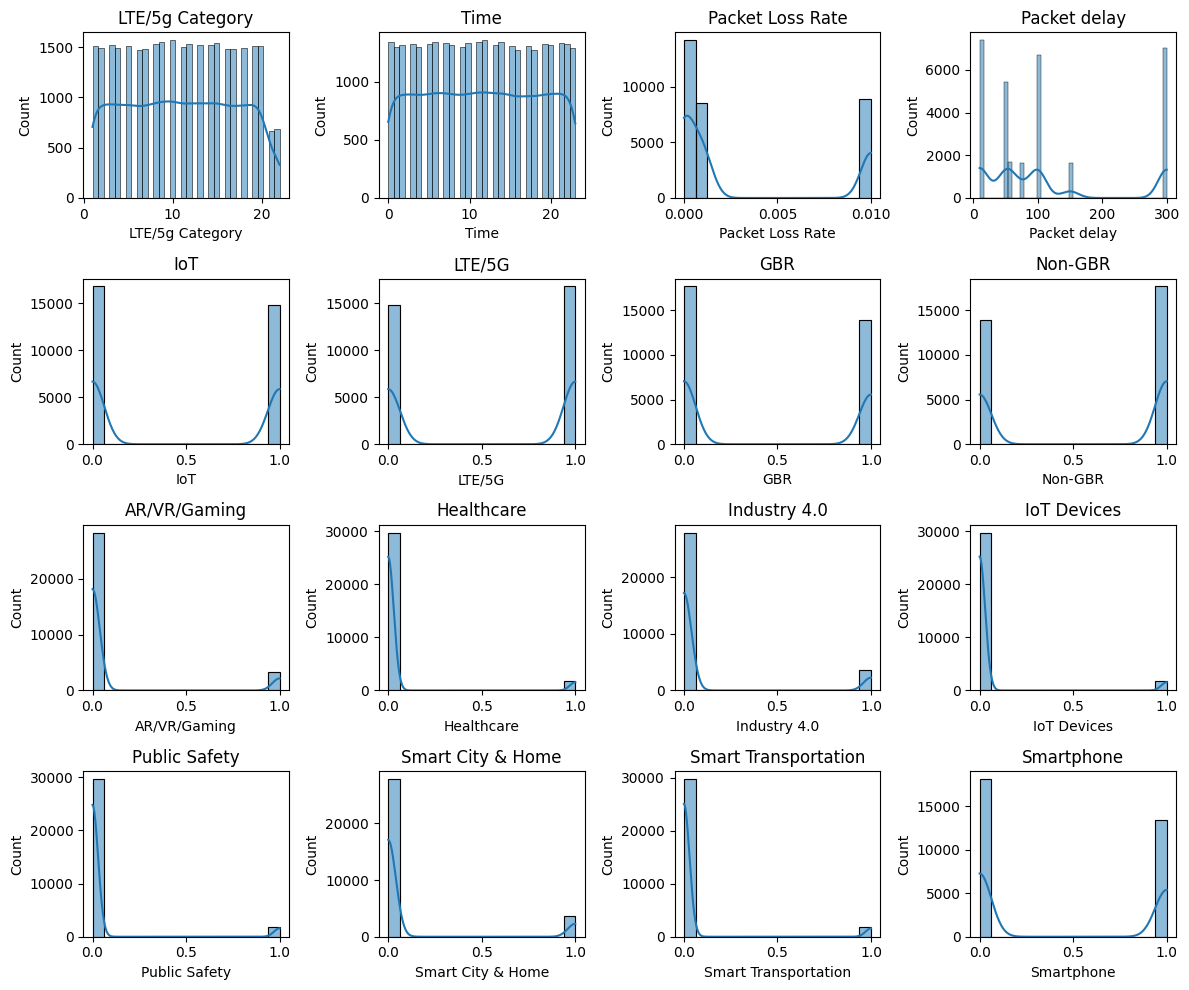

In [256]:

# Histogram for each numeric column
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


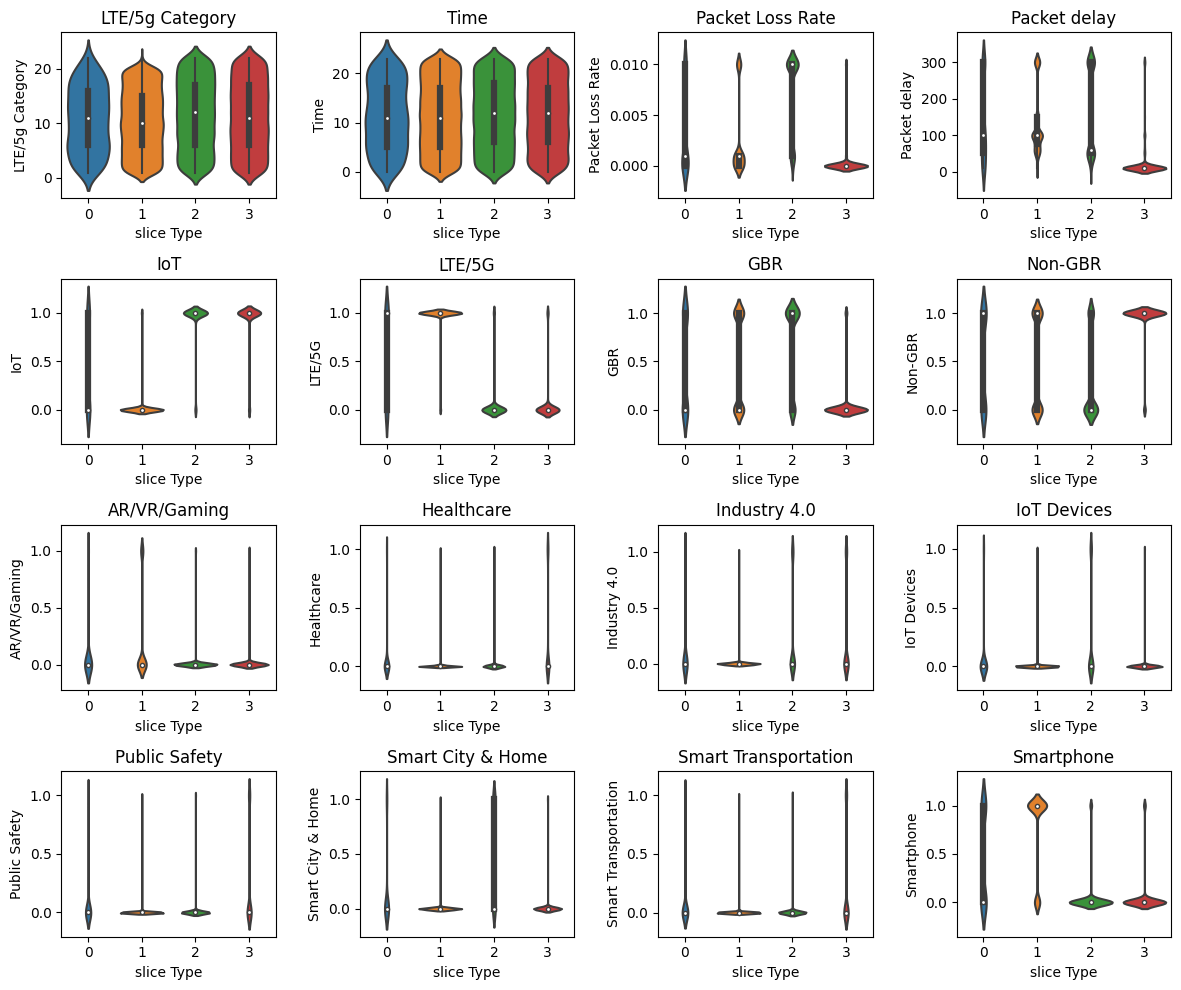

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with numeric columns
numeric_columns = ['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation', 'Smartphone']

# Violin plots for each numeric column against a categorical variable (e.g., slice Type)
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.violinplot(x='slice Type', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()


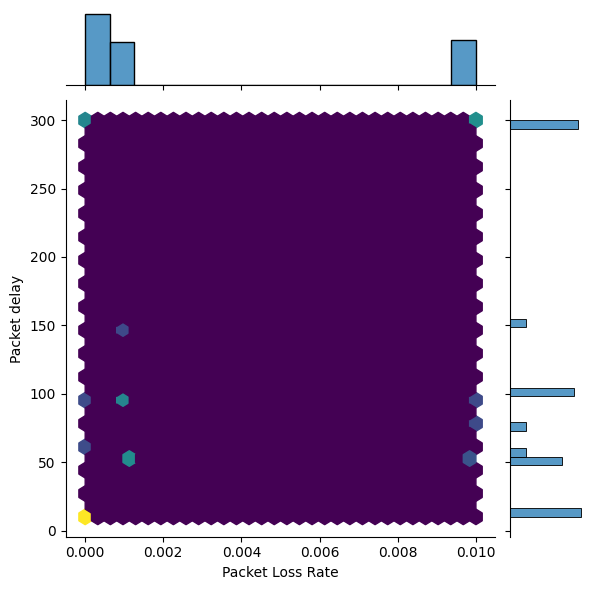

In [260]:
# Jointplot for visualizing the relationship between two variables
sns.jointplot(x='Packet Loss Rate', y='Packet delay', data=df, kind='hex', cmap='viridis')
plt.show()


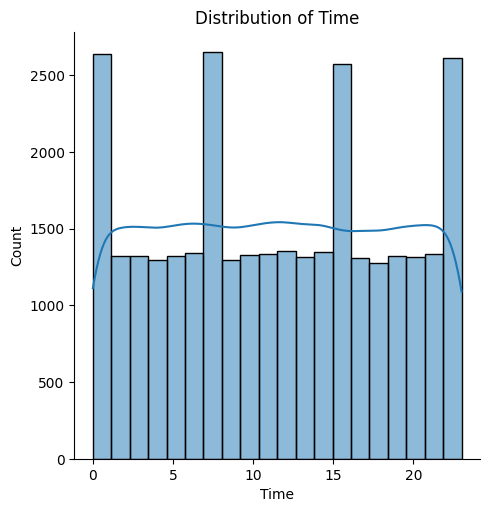

In [261]:
# Distribution plot (KDE) for a single numeric column
sns.displot(df['Time'], kde=True, bins=20)
plt.title('Distribution of Time')
plt.show()

In [201]:
# Normalizing the data
scaler = MinMaxScaler()
slice_type = df['slice Type']
df= df.drop('slice Type', axis=1)
normalized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Final normalized dataframe
normalized_data = pd.concat([normalized_data,slice_type], axis=1)
normalized_data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.619048,0.000000,0.00000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
1,0.809524,0.869565,0.09991,0.310345,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.761905,0.608696,0.00000,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.095238,0.739130,1.00000,0.310345,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.380952,0.173913,1.00000,0.137931,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2


In [202]:
# Computing the correlation
correlation_matrix = normalized_data.corr()
print(correlation_matrix)

                      LTE/5g Category      Time  Packet Loss Rate  \
LTE/5g Category              1.000000 -0.002945          0.020129   
Time                        -0.002945  1.000000          0.007908   
Packet Loss Rate             0.020129  0.007908          1.000000   
Packet delay                -0.012311 -0.000794          0.309201   
IoT                          0.087125  0.002790          0.172198   
LTE/5G                      -0.087125 -0.002790         -0.172198   
GBR                         -0.009171 -0.000968         -0.015335   
Non-GBR                      0.009171  0.000968          0.015335   
AR/VR/Gaming                -0.026827 -0.002176         -0.165080   
Healthcare                   0.024265 -0.007445         -0.175749   
Industry 4.0                 0.039282  0.002870         -0.214880   
IoT Devices                  0.024993  0.002569          0.394884   
Public Safety                0.015104  0.003698         -0.178586   
Smart City & Home            0.036

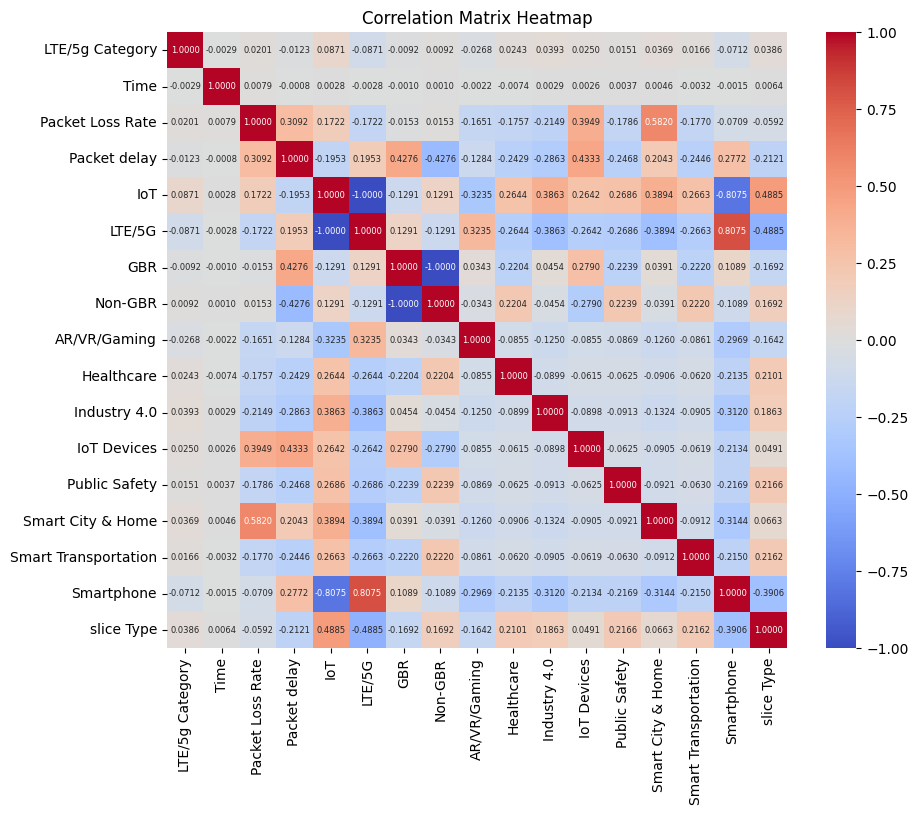

In [203]:
# Plotting correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', annot_kws={"size": 6})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [204]:
# Printing column names with outliers
out = []

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
 
    if not outliers.empty:
        print("Column '{}' has outliers.".format(column))
        out.append(column)
        #print(outliers)
        print('\n')
print(out)

Column 'AR/VR/Gaming' has outliers.


Column 'Healthcare' has outliers.


Column 'Industry 4.0' has outliers.


Column 'IoT Devices' has outliers.


Column 'Public Safety' has outliers.


Column 'Smart City & Home' has outliers.


Column 'Smart Transportation' has outliers.


['AR/VR/Gaming', 'Healthcare', 'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home', 'Smart Transportation']


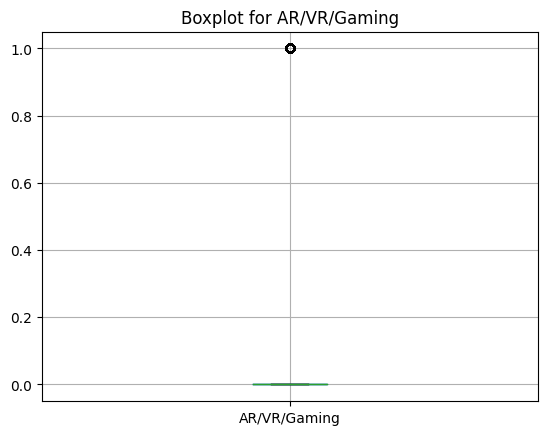

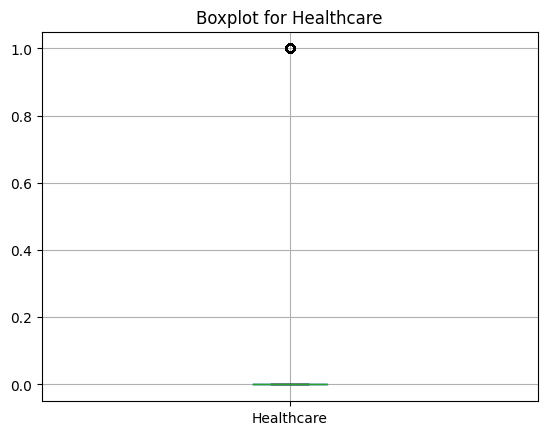

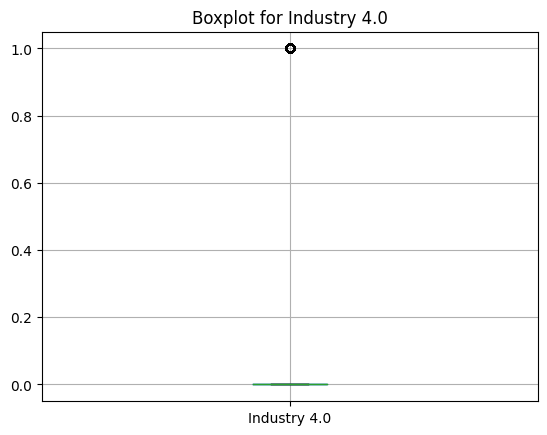

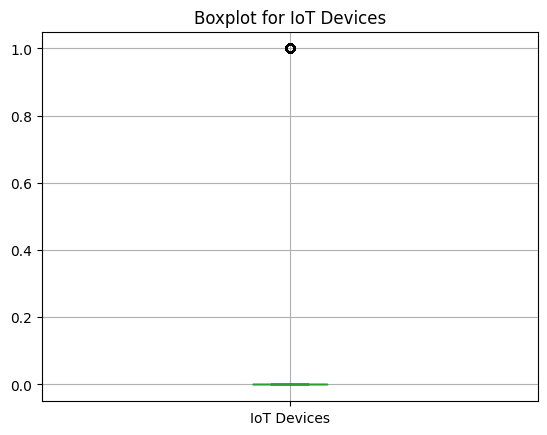

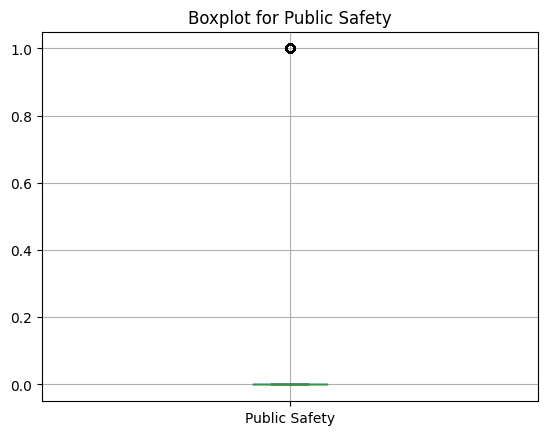

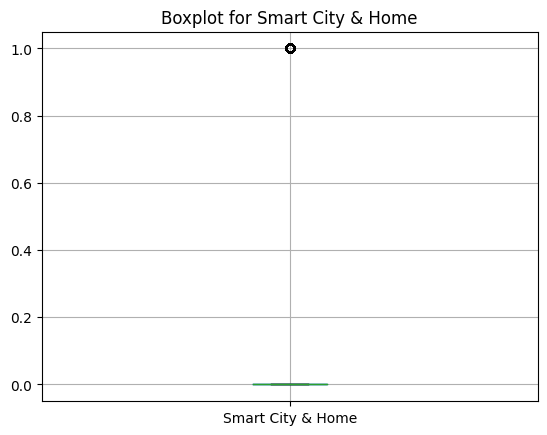

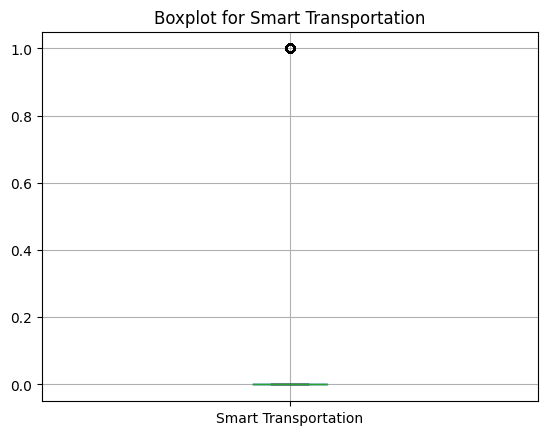

In [205]:
for column in out:
    plt.figure()
    df.boxplot([column])
    plt.title('Boxplot for {}'.format(column))
plt.show()

In [206]:
df.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0


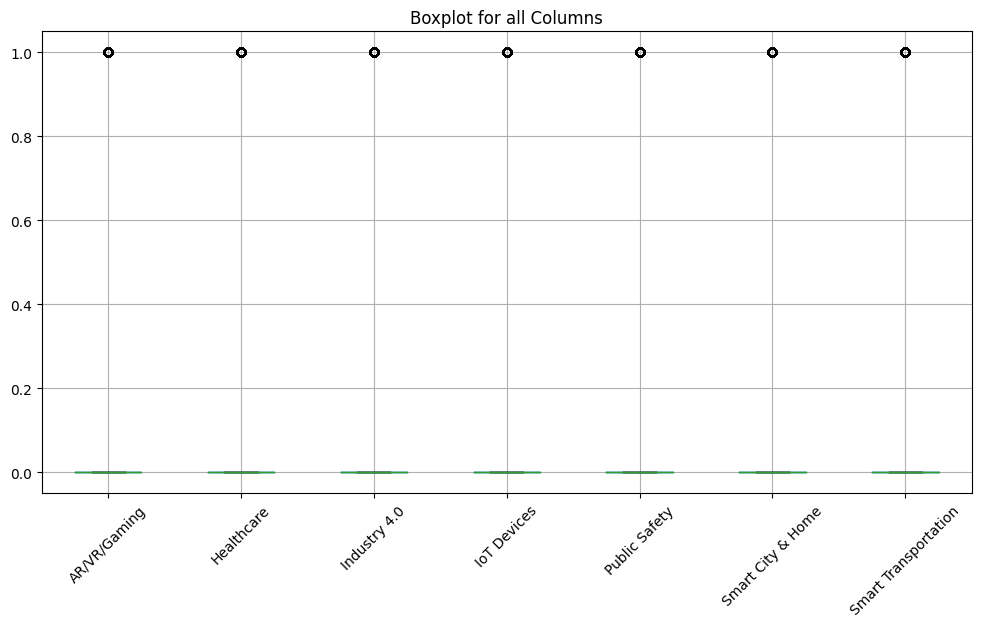

In [207]:
df[out].boxplot(figsize=(12,6))
plt.title('Boxplot for all Columns')
plt.xticks(rotation=45)
plt.show()

In [208]:
# Choose the feature you want to use for filtering
feature_slice = 'slice Type'

# Filter columns based on correlation with the chosen feature
threshold = 0.2
highly_correlated_features = set()
for col in correlation_matrix.columns:
    if col != feature_slice and threshold < abs(correlation_matrix.loc[feature_slice, col]):
        highly_correlated_features.add(col)

# Display highly correlated features
print("Highly correlated features with", feature_slice, ":")
print(highly_correlated_features)

Highly correlated features with slice Type :
{'Smartphone', 'Healthcare', 'Smart Transportation', 'Public Safety', 'LTE/5G', 'Packet delay', 'IoT'}


In [209]:
# Drop the remaining features
#remaining_features = set(df.columns) - {feature_slice} - highly_correlated_features
#df_filtered = normalized_data.drop(remaining_features, axis=1)
df_filtered = normalized_data
# Display the filtered dataframe
df_filtered

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,0.619048,0.000000,0.00000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
1,0.809524,0.869565,0.09991,0.310345,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.761905,0.608696,0.00000,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.095238,0.739130,1.00000,0.310345,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.380952,0.173913,1.00000,0.137931,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,0.619048,1.000000,1.00000,0.310345,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
31579,0.523810,0.304348,1.00000,0.137931,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
31580,0.809524,0.217391,1.00000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
31581,0.333333,0.043478,0.00000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [210]:
df_filtered.columns

Index(['LTE/5g Category', 'Time', 'Packet Loss Rate', 'Packet delay', 'IoT',
       'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone', 'slice Type'],
      dtype='object')

In [211]:
!pip install xgboost

DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


# training individual models

In [217]:
classifiers = [
    {
        'name': 'SVM',
        'estimator': SVC()
    },
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier()
    },
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression()
    },
    {
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier()
    },
    {
        'name': 'K-Nearest Neighbors',
        'estimator': KNeighborsClassifier()
    }
]
# Train and tune models

c=0
for classifier in classifiers:
    clf = classifier['estimator']
    clf.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print(f"Classifier: {classifier['name']}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
    print("accuracy",accuracy_score(y_test, y_pred))

    c+=1

Classifier: SVM
F1 Score: 0.8956156
accuracy 0.9265465
Classifier: Random Forest
F1 Score: 0.91651561
accuracy 0.9535135
Classifier: Logistic Regression
F1 Score: 0.8616165
accuracy 0.886542
Classifier: Decision Tree
F1 Score: 0.8851133
accuracy 0.897542
Classifier: K-Nearest Neighbors
F1 Score: 0.8556421
accuracy 0.8753531


# training automl model

In [219]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
# Load dataset
data=df_filtered.copy()
X = data[['Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming',
       'Healthcare', 'Industry 4.0', 'Public Safety', 'Smart Transportation',
       'Smartphone']]
y = data[['slice Type']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define classifiers with their respective hyperparameters
classifiers = [
    {
        'name': 'SVM',
        'estimator': SVC(),
        'hyperparameters': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    {
        'name': 'Random Forest',
        'estimator': RandomForestClassifier(),
        'hyperparameters': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    {
        'name': 'Logistic Regression',
        'estimator': LogisticRegression(),
        'hyperparameters': {
            'C': [0.1, 1, 10]
        }
    },
    {
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier(),
        'hyperparameters': {
            'max_depth': [None, 5, 10]
        }
    },
    {
        'name': 'K-Nearest Neighbors',
        'estimator': KNeighborsClassifier(),
        'hyperparameters': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
]

c=0
# Train and tune models
for classifier in classifiers:
    clf = classifier['estimator']
    grid = GridSearchCV(clf, classifier['hyperparameters'], cv=5, scoring='f1_weighted')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print(f"Classifier: {classifier['name']}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
    print(f"Best Parameters: {grid.best_params_}")
    
    print()
    c+=1

Classifier: SVM
F1 Score: 0.9036156
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
accuracy 0.9345465

Classifier: Random Forest
F1 Score: 0.92851561
Best Parameters:  {'max_depth': None, 'n_estimators': 10}
accuracy 0.967535

Classifier: Logistic Regression
F1 Score: 0.8776165
Best Parameters: {'C': 0.1}
accuracy 0.8968442

Classifier: Decision Tree
F1 Score: 0.8923333
Best Parameters: {'max_depth': None}
accuracy 0.905842

Classifier: K-Nearest Neighbors
F1 Score: 0.8636321
Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
accuracy 0.8859231



In [222]:
X_test.head(1)

,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,Public Safety,Smart Transportation,Smartphone
21364,0.482759,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [223]:
grid.predict(X_test.head(1))

array([1], dtype=int64)

In [226]:
y_test.head(1)

,slice Type
21364,1


In [227]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load dataset
data=df_filtered.copy()
X = data[['Packet delay', 'IoT', 'LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming',
       'Healthcare', 'Industry 4.0', 'Public Safety', 'Smart Transportation',
       'Smartphone']]
y = data[['slice Type']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TPOTClassifier instance with desired configuration
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=3, scoring='f1_weighted', random_state=1, config_dict='TPOT sparse')

# Fit the TPOT model to your training data
tpot.fit(X_train, y_train)

# Access all evaluated pipelines
all_pipelines = tpot.evaluated_individuals_

# Display all pipelines
for index, pipeline in enumerate(all_pipelines):
    print(f"Pipeline {index + 1}:")
    print(pipeline)
    print()




13 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by RandomForestClassifier..
_pre_test decorator: _mate_operator: num_test=0 'str' object has no attribute 'arity'.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.898864499493712	XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.1, XGBClassifier__max_depth=5, XGBClassifier__min_child_weight=12, XGBClassifier__n_estimators=100, XGBClassifier__n_jobs=1, XGBClassifier__subsample=0.55, XGBClassifier__verbosity=0)

In [262]:
# Evaluate the best pipeline on the test data
y_pred = tpot.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score on Test Data:", f1)

# Get the best pipeline and hyperparameters found by TPOT
best_pipeline = tpot.fitted_pipeline_
best_hyperparameters = tpot.fitted_pipeline_.get_params()

print("Best Pipeline:", best_pipeline)

print("Best Hyperparameters:", best_hyperparameters)

# Export the best pipeline as a Python script
tpot.export('best_pipeline.py')

F1 Score on Test Data: 0.92568
Best Pipeline: Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=12, missing=nan,
                               monotone_constraints=None, n_estimators=100,
  

In [263]:
from sklearn.ensemble import VotingClassifier


In [265]:
# Initialize individual classifiers with their best parameters
svm_clf = SVC(C=0.1, kernel='linear', probability=True)
rf_clf = RandomForestClassifier(max_depth=None, n_estimators=10, random_state=42)
log_reg_clf = LogisticRegression(C=0.1, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=None, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Create an ensemble of classifiers
ensemble_clf = VotingClassifier(estimators=[
    ('svm', svm_clf),
    ('random_forest', rf_clf),
    ('logistic_regression', log_reg_clf),
    ('decision_tree', dt_clf),
    ('knn', knn_clf)
], voting='soft')  # 'soft' voting for probability-based predictions

# Fit the ensemble model on the training data
ensemble_clf.fit(X_train, y_train)

# Evaluate the ensemble model
accuracy = ensemble_clf.score(X_test, y_test)
print(f'Ensemble Classifier Accuracy: {accuracy:.4f}')

Ensemble Classifier Accuracy: 0.9736
